In [1]:
import torch
import torch.nn as nn
import torchvision.datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

In [2]:
from src.diffusion import Diffusion
from src.unet import UNet
from src.utils import ASL_mnist, show_dataset_images, show_samples, numel

In [3]:
dataset_path = './datasets'
batch_size = 256

image_channels = 1
image_size = 28

In [4]:
if torch.cuda.is_available():
  device = 'cuda'
  print('CUDA')
else:
  device = 'cpu'
  print('CPU')

CUDA


In [5]:
transform = transforms.Compose([
    transforms.Lambda(lambda t: (t/255.)*2. - 1)
])

reverse_transform = transforms.Compose([
    transforms.Lambda(lambda t: t.detach().cpu().permute(1, 2, 0).numpy())
])

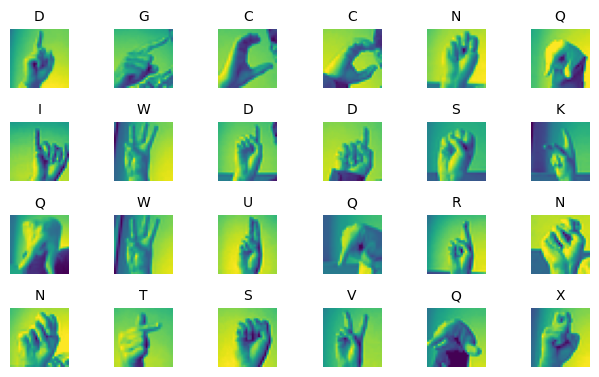

In [6]:
train_dataset = ASL_mnist(dataset_path, transform=transform)
show_dataset_images(train_dataset, reverse_transform)

In [7]:
ddpm_narrow = Diffusion(UNet(channel_mults=[8, 24, 32], attention_heads=[None, None, None]), device)
ddpm_attn = Diffusion(UNet(channel_mults=[8, 24, 32], attention_heads=[None, 1, 1]), device)
ddpm_wide = Diffusion(UNet(channel_mults=[16, 32, 64], attention_heads=[None, None, None]), device)

print(f'Number of trainable parameters in a narrow model without attention: {numel(ddpm_narrow.model)}')
print(f'Number of trainable parameters in a narrow model with attention: {numel(ddpm_attn.model)}')
print(f'Number of trainable parameters in a wide model without attention: {numel(ddpm_wide.model)}')

Number of trainable parameters in a narrow model without attention: 165229
Number of trainable parameters in a narrow model with attention: 184901
Number of trainable parameters in a wide model without attention: 532925


In [8]:
ddpm_narrow.load_model_as('narrow_model_state')
ddpm_attn.load_model_as('attn_model_state')
ddpm_wide.load_model_as('wide_model_state')

w = 0.0


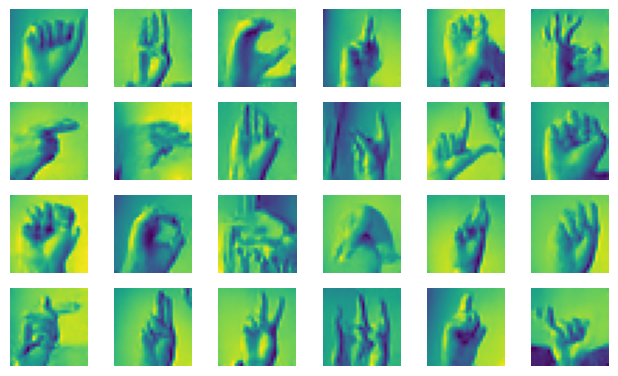

w = 0.5


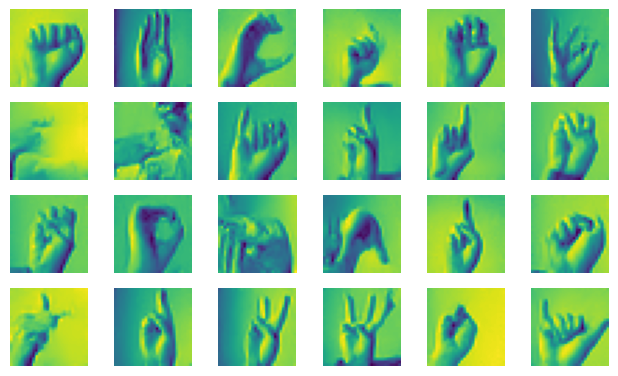

In [9]:
w_list = [0., .5]
for w in w_list:
    print(f'w = {w}')
    show_samples(ddpm_narrow, reverse_transform, w=w)

w = 0.0


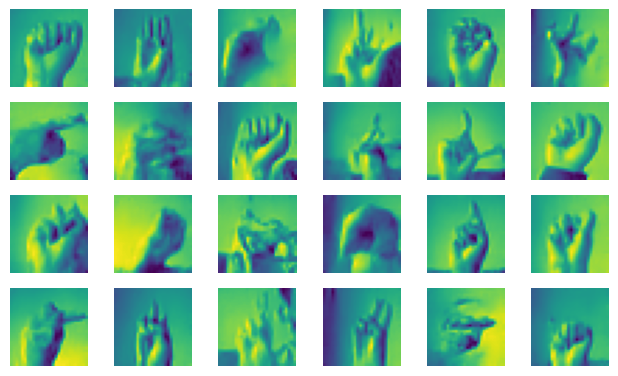

w = 0.5


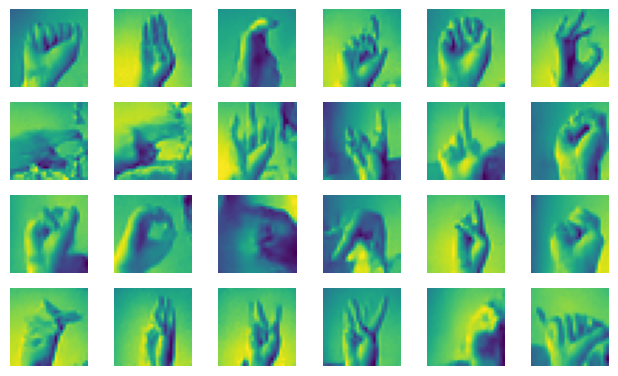

In [10]:
for w in w_list:
    print(f'w = {w}')
    show_samples(ddpm_attn, reverse_transform, w=w)

w = 0.0


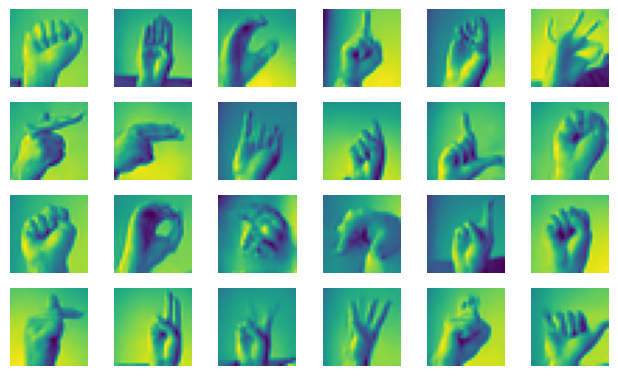

w = 0.5


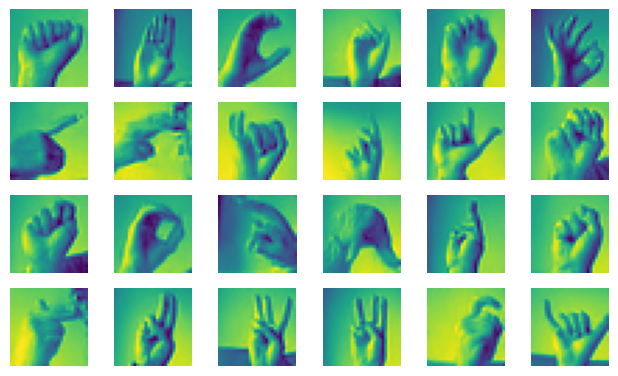

In [11]:
for w in w_list:
    print(f'w = {w}')
    show_samples(ddpm_wide, reverse_transform, w=w)